## In this project, I will be predicting passengers survival on the Titanic based on variables present in the dataset found on kaggle (https://www.kaggle.com/competitions/titanic/data)

### My Analysis
Here is the approach for the project:
1. Data Processing
2. Exploratory Data Analysis
3. Methods
4. Results & Discussion

## 1. Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
titanic_train = pd.read_csv("train.csv")

In [15]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### I will remove the Name, Ticket and Cabin columns first as logically they may not be of importance.

In [16]:
titanic_train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

### Visualize Missing Data

Text(0.5, 1, 'Visualize Missing Data')

<Figure size 1080x720 with 0 Axes>

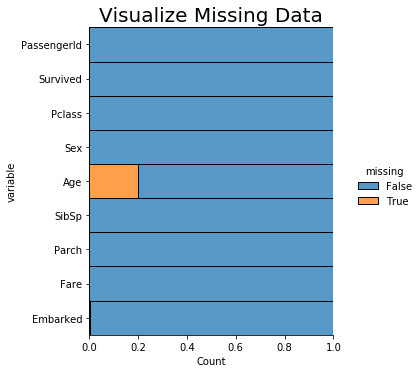

In [17]:
plt.figure(figsize=(15, 10))
sns.displot(titanic_train.isna().melt(value_name= "missing"), 
            y = "variable", 
            hue = "missing",
            multiple = "fill")
plt.title("Visualize Missing Data", fontsize = 20)

### The missing data appears to be mainly in the Age column and a few in the Embarked column. I would replace the NA values in the Age and Embarked columns with the median and mode values from the remaining values of their respective columns.

In [18]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())

In [19]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

Text(0.5, 1, 'Check Any Missing Data')

<Figure size 1080x720 with 0 Axes>

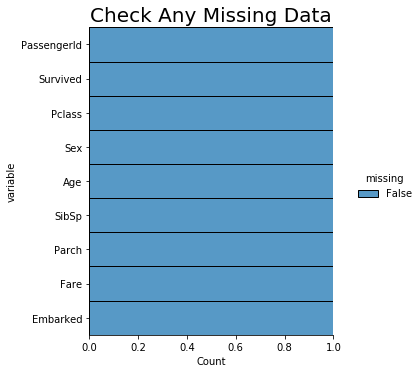

In [21]:
plt.figure(figsize=(15, 10))
sns.displot(titanic_train.isna().melt(value_name= "missing"), 
            y = "variable", 
            hue = "missing",
            multiple = "fill")
plt.title("Check Any Missing Data", fontsize = 20)

In [22]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Due to the categorical nature of Sex and Embarked columns, we will use the LabelEncoder function to group them to a numerical value.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
titanic_train['Sex'] = le.fit_transform(titanic_train['Sex'])
titanic_train['Embarked'] = le.fit_transform(titanic_train['Embarked']) 

In [25]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Due to the continuous nature of the Age and Fare column, I would classify it into groups.

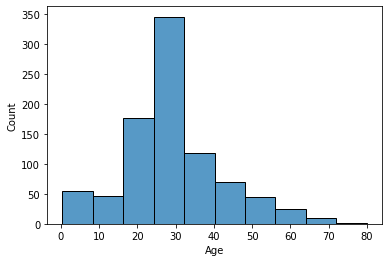

In [26]:
sns.histplot(x="Age", data = titanic_train, bins = 10)

In [27]:
titanic_train["Age"] = pd.cut(titanic_train['Age'], bins=[0, 20, 30, 40, 60, 80], labels=[1, 2, 3, 4, 5])

In [28]:
titanic_train["Fare"] = pd.qcut(titanic_train['Fare'], 5, labels = [1, 2, 3, 4, 5])

In [29]:
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,2,1,0,1,2
1,2,1,1,0,3,1,0,5,0
2,3,1,3,0,2,0,0,2,2
3,4,1,1,0,3,1,0,5,2
4,5,0,3,1,3,0,0,2,2


### Next, we can split the titanic_train dataset into training and test datasets

In [30]:
from sklearn.model_selection import train_test_split

X = titanic_train.drop(['Survived'], axis = 1)
y = titanic_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### We can then repeat the previous steps with the test dataset

In [31]:
titanic_test = pd.read_csv("test.csv")

In [32]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
titanic_test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

Text(0.5, 1, 'Visualize Missing Data')

<Figure size 1080x720 with 0 Axes>

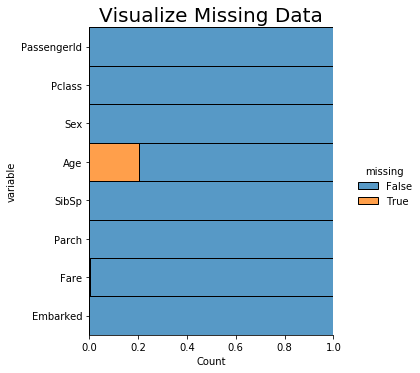

In [35]:
plt.figure(figsize=(15, 10))
sns.displot(titanic_test.isna().melt(value_name= "missing"), 
            y = "variable", 
            hue = "missing",
            multiple = "fill")
plt.title("Visualize Missing Data", fontsize = 20)

In [36]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].median())

In [37]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test["Fare"].mean())

Text(0.5, 1, 'Visualize Missing Data')

<Figure size 1080x720 with 0 Axes>

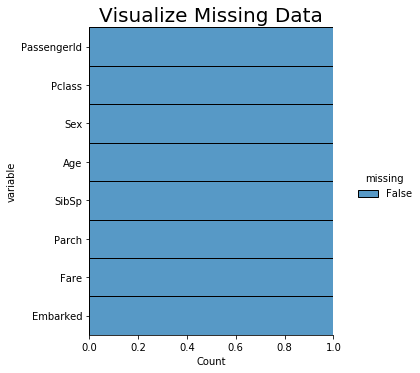

In [38]:
plt.figure(figsize=(15, 10))
sns.displot(titanic_test.isna().melt(value_name= "missing"), 
            y = "variable", 
            hue = "missing",
            multiple = "fill")
plt.title("Visualize Missing Data", fontsize = 20)

In [39]:
titanic_test['Sex'] = le.fit_transform(titanic_test['Sex'])
titanic_test['Embarked'] = le.fit_transform(titanic_test['Embarked']) 

In [40]:
titanic_test["Age"] = pd.cut(titanic_test['Age'], bins=[0, 20, 30, 40, 60, 80], labels=[1, 2, 3, 4, 5])
titanic_test["Fare"] = pd.qcut(titanic_test['Fare'], 5, labels = [1, 2, 3, 4, 5])

In [41]:
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,3,0,0,2,1
1,893,3,0,4,1,0,1,2
2,894,2,1,5,0,0,2,1
3,895,3,1,2,0,0,2,2
4,896,3,0,2,1,1,3,2


## 2. Exploratory Data Analysis
### Now that the data has been processed, I will proceed with some EDA to visualize potential correlation in the dataset

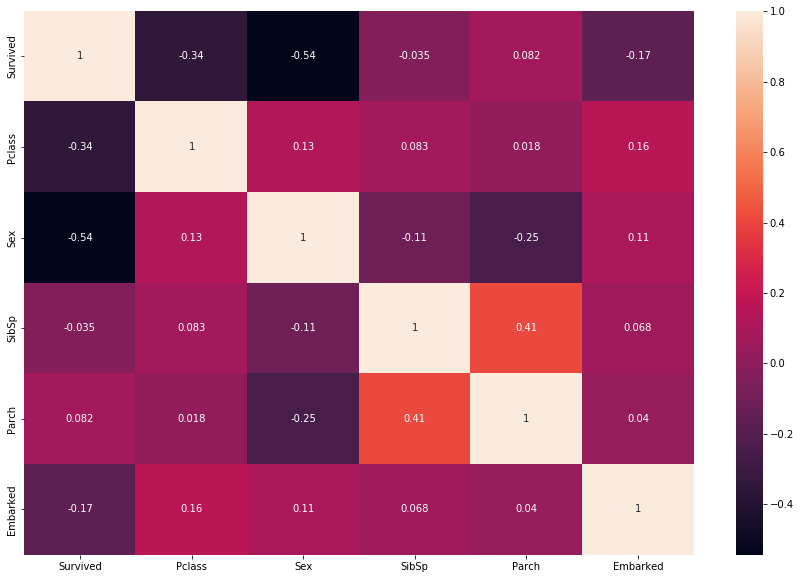

In [42]:
plt.figure(figsize = (15, 10))
sns.heatmap(titanic_train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].corr(), annot = True)

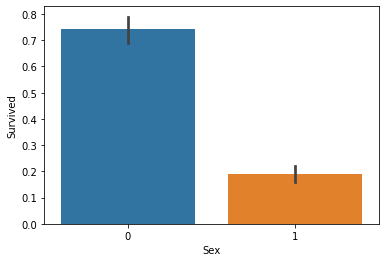

In [43]:
sns.barplot(x = "Sex", y = "Survived", data = titanic_train)

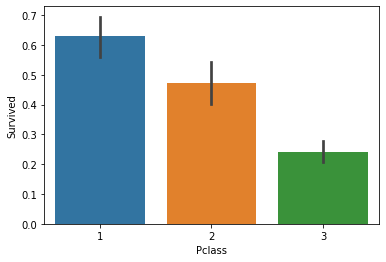

In [44]:
sns.barplot(x = "Pclass", y = "Survived", data = titanic_train)

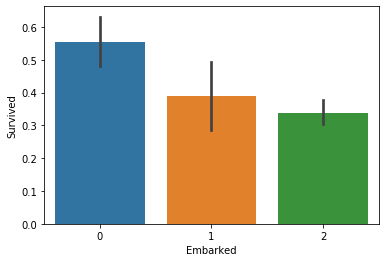

In [45]:
sns.barplot(x = "Embarked", y = "Survived", data = titanic_train)

## 3. Methods
### Here, I will experiment with various machine learning algorithms to determine the accuracy in predicting a passenger surviving. The algorithms used would be:
1. Logistic Regression
2. Random Forest
3. K-Nearest Neighbours
4. Decision Trees

### Model 1: Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
logmodel = LogisticRegression(max_iter = 5000)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluate Model 1

In [48]:
predictions_log = logmodel.predict(X_test)
acc_log = accuracy_score(y_test, predictions_log)
print(acc_log)

0.7574626865671642


### Model 2: Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluate Model 2

In [51]:
predictions_rfc = rfc.predict(X_test)
acc_rfc = accuracy_score(y_test, predictions_rfc)
print(acc_rfc)

0.7873134328358209


### Model 3: K-Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

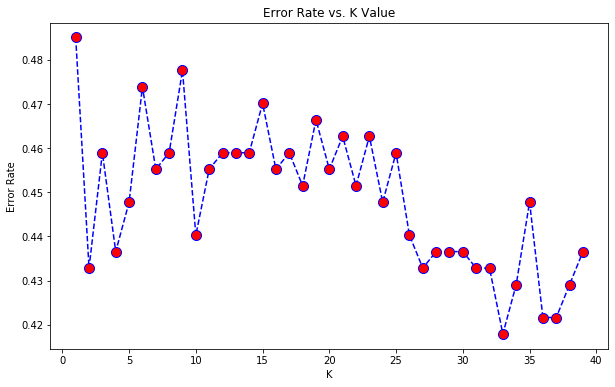

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

### Evaluate Model 3

In [57]:
predictions_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, predictions_knn)
print(acc_knn)

0.582089552238806


### Model 4: Decision Trees

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluate Model 4

In [60]:
predictions_dt = dtree.predict(X_test)
acc_dt = accuracy_score(y_test, predictions_dt)
print(acc_dt)

0.7276119402985075


In [61]:
data = {"Method":["Logistic Regression", "KNN","Random Forest", "Decision Trees"],
       "accuracy":[acc_log, acc_knn, acc_rfc, acc_dt]}

results = pd.DataFrame(data)
print(results)

                Method  accuracy
0  Logistic Regression  0.757463
1                  KNN  0.582090
2        Random Forest  0.787313
3       Decision Trees  0.727612


### It appears that the Random Forest Algorithm would be the most accurate algorithm

### Evaluating the actual test data

In [62]:
predictions_actual = rfc.predict(titanic_test)

In [63]:
titanic_test['Survived'] = predictions_actual

In [64]:
titanic_submission = titanic_test[['PassengerId', 'Survived']]

In [65]:
titanic_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [66]:
titanic_submission.to_csv("Submission.csv")

### This code managed to achieve a score of 0.74641